## How to do it...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Padding the images by 2 pixels
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [4]:
image_width = x_train[0].shape[0]
image_height = x_train[0].shape[1]
num_channels = 1 # grayscale = 1 channel

seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
batch_size = 100
evaluation_size = 500
epochs = 300
eval_every = 5

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width, image_height, num_channels), name="INPUT")

# First Conv-ReLU-MaxPool Layer
conv1 = tf.keras.layers.Conv2D(filters=6,
                               kernel_size=5,
                               padding='VALID',
                               activation='relu',
                               name='C1')(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2,
                                      padding='SAME',
                                      name='S1')(conv1)

# Seconds Conv-ReLU-MaxPool Layer
conv2 = tf.keras.layers.Conv2D(filters=16, 
                              kernel_size=5, 
                              padding='VALID', 
                              strides=1, 
                              activation='relu',
                              name='C3')(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(pool_size=2, 
                                      strides=2, 
                                      padding='SAME',
                                      name='S4')(conv2)

# Flatten Layer
flatten = tf.keras.layers.Flatten(name='FLATTEN')(max_pool2)

# First fully connected layer
fully_connected1 = tf.keras.layers.Dense(units=120, 
                                        activation='relu',
                                        name='F5')(flatten)

# Second fully connected layer
fully_connected2 = tf.keras.layers.Dense(units=84,
                                         activation='relu',
                                         name='F6')(fully_connected1)

# Final fully connected layer
final_model_output = tf.keras.layers.Dense(units=10, 
                                           activation='softmax',
                                           name='OUTPUT')(fully_connected2)

model = tf.keras.Model(inputs=input_data, outputs=final_model_output)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 32, 32, 1)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S1 (MaxPooling2D)            (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (MaxPooling2D)            (None, 5, 5, 16)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 400)               0         
_________________________________________________________________
F5 (Dense)                   (None, 120)               48120 

In [16]:
train_loss = []
train_acc = []
test_acc = []

for i in range(epochs):
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_index]
    rand_y = y_train[rand_index]
    
    history_train = model.train_on_batch(rand_x, rand_y)
    
    if (i + 1) % eval_every == 0:
        eval_index = np.random.choice(len(x_test), size=evaluation_size)
        eval_x = x_test[eval_index]
        eval_y = y_test[eval_index]
        
        history_eval = model.evaluate(eval_x, eval_y)
        
        # Record and print results
        train_loss.append(history_train[0])
        train_acc.append(history_train[1])
        test_acc.append(history_eval[1])
        acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
        acc_and_loss = [np.round(x, 2) for x in acc_and_loss]
        print(f'Epoch # {acc_and_loss[0]}. Train Loss: {acc_and_loss[1]}. Train Acc (Test Acc): {acc_and_loss[2]} ({acc_and_loss[3]})')

16/16 [==============================] - 0s 981us/step - loss: 2.0948 - accuracy: 0.4780
Epoch # 5. Train Loss: 2.14. Train Acc (Test Acc): 0.39 (0.48)
16/16 [==============================] - 0s 1ms/step - loss: 1.8599 - accuracy: 0.7100
Epoch # 10. Train Loss: 1.96. Train Acc (Test Acc): 0.65 (0.71)
16/16 [==============================] - 0s 1ms/step - loss: 1.4873 - accuracy: 0.7680
Epoch # 15. Train Loss: 1.59. Train Acc (Test Acc): 0.82 (0.77)
16/16 [==============================] - 0s 957us/step - loss: 1.0868 - accuracy: 0.7660
Epoch # 20. Train Loss: 1.24. Train Acc (Test Acc): 0.68 (0.77)
16/16 [==============================] - 0s 946us/step - loss: 0.7358 - accuracy: 0.8280
Epoch # 25. Train Loss: 0.88. Train Acc (Test Acc): 0.75 (0.83)
16/16 [==============================] - 0s 931us/step - loss: 0.6759 - accuracy: 0.7840
Epoch # 30. Train Loss: 0.57. Train Acc (Test Acc): 0.84 (0.78)
16/16 [==============================] - 0s 985us/step - loss: 0.4980 - accuracy: 0.832

16/16 [==============================] - 0s 945us/step - loss: 0.1482 - accuracy: 0.9640
Epoch # 270. Train Loss: 0.11. Train Acc (Test Acc): 0.99 (0.96)
16/16 [==============================] - 0s 916us/step - loss: 0.1353 - accuracy: 0.9560
Epoch # 275. Train Loss: 0.13. Train Acc (Test Acc): 0.99 (0.96)
16/16 [==============================] - 0s 953us/step - loss: 0.1616 - accuracy: 0.9640
Epoch # 280. Train Loss: 0.14. Train Acc (Test Acc): 0.96 (0.96)
16/16 [==============================] - 0s 958us/step - loss: 0.1090 - accuracy: 0.9660
Epoch # 285. Train Loss: 0.13. Train Acc (Test Acc): 0.95 (0.97)
16/16 [==============================] - 0s 952us/step - loss: 0.1353 - accuracy: 0.9660
Epoch # 290. Train Loss: 0.18. Train Acc (Test Acc): 0.93 (0.97)
16/16 [==============================] - 0s 951us/step - loss: 0.1288 - accuracy: 0.9680
Epoch # 295. Train Loss: 0.07. Train Acc (Test Acc): 0.97 (0.97)
16/16 [==============================] - 0s 938us/step - loss: 0.1334 - accu

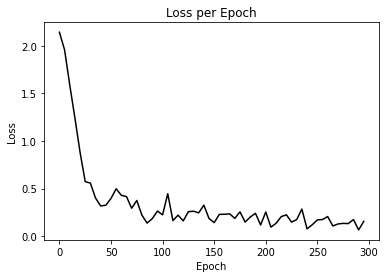

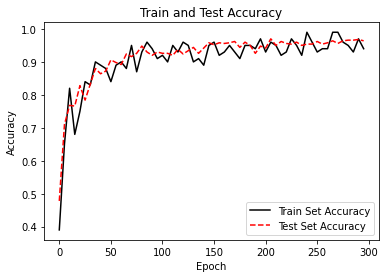

In [17]:
# Matplotlib code to plot the loss and accuracy
eval_indices = range(0, epochs, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

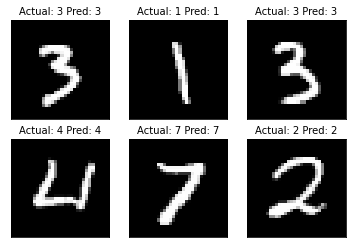

In [19]:
# Plot some samples and their predictions
actuals = y_test[30:36]
preds = model.predict(x_test[30:36])
predictions = np.argmax(preds, axis=1)
images = np.squeeze(x_test[30:36])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [32, 32]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()